In [1]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
data_train = pd.read_csv("data_train.csv")
data_test = pd.read_csv("data_test.csv")
X = data_train[['intensity','symmetry']]

In [3]:
y0 = np.where(data_train["digit"] ==0, 1 ,-1)
Clist = [-2,-1,0,1,2]


In [4]:
d = []
for c in Clist:
    result = svm.SVC(C = 10**c, kernel = "rbf", gamma = 80).fit(X,y0)
    K = [ind for ind, coef in  enumerate(abs(result.dual_coef_[0])) if coef > 0 and coef < 10**c]
    d = d + [1/abs(result.decision_function(result.support_vectors_[K])).mean()]


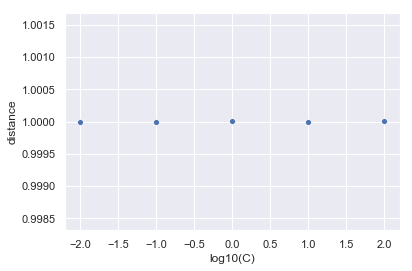

In [5]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
df=pd.DataFrame({'log10(C)': Clist, 'distance': d})
ax = sns.scatterplot(x='log10(C)', y='distance',data=df)


In [6]:
print(d)

[0.9999999999909325, 0.9999857911256719, 1.0000119984722506, 0.9999920492162087, 1.000000485322164]


Q15: The distance to the hyperplane always is 1.